#### **In this project we are going to analyse the anime data availble on Kaggle.com.** 

##### Let us try to find some trends in the data & see if we can develop something meaningfull out of this.

##### This data is available on [here](https://www.kaggle.com/datasets/lorentzyeung/all-japanese-anime-titles-in-imdb).

##### STEP 1 - Import the relevant libraries.

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
# sns.set_style()
# matplotlib.style.use('ggplot')
sns.set()

In [41]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

##### STEP 2 - Extract the rar file and read the data using Pandas DataFrame.

In [28]:
# import patoolib

# patoolib.extract_archive('data/anime_data.zip', outdir='data')

In [29]:
rdata = pd.read_csv('data/imdb_anime.csv')

##### STEP 3 - DATA EXPLORATION.

In [30]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
dtypes: object(13)
memory usage: 4.5+ MB


#### This code below can be used to optimise the datatypes. This step is crutial when you are dealing with large datasets, as it will make a huge impact on the performance of the code and conserving valuable space. 

#### You can reuse this function for any dataframe.

In [31]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**3
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**3
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [32]:
rdata = reduce_mem_usage(rdata)

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 15.5%


In [33]:
rdata.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,"187,689",24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,"28,895",99 min,(2023),The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,"189,108",92 min,(2023),A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,"434,457",24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,"82,909",24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


In [34]:
rdata.describe()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
count,45717,45717,25009,25009,32549,45591,23547,13676,28694,341,25009,45717,34910
unique,9851,201,87,3033,196,740,22588,6460,33,60,3033,3,33779
top,Doraemon,"Animation, Action, Adventure",7.6,7,24 min,(1969– ),A young teen who surfs the skies with his ref ...,"Nobuyo Ôyama,Noriko Ohara,Michiko Nomura,Kazuy...",TV-14,74,7,1,Episode #1.2
freq,2758,13568,1270,567,9636,2399,25,765,10033,21,567,34909,12


In [35]:
d1 = rdata.copy()

In [36]:
# d1.groupby(['Genre'])['Title'].count().plot(kind='bar')
def gen_len(df):
    return len(df.split(','))
d1['Genre'].apply(gen_len).unique()

array([3, 2, 1])

In [37]:
d1['Genre'] = d1['Genre'].str.split(',')

In [38]:
d1.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"[Animation, Action, Adventure]",8.9,"187,689",24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"[Animation, Action, Adventure]",7.4,"28,895",99 min,(2023),The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"[Animation, Adventure, Comedy]",7.1,"189,108",92 min,(2023),A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"[Animation, Action, Adventure]",9.1,"434,457",24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"[Animation, Action, Adventure]",8.5,"82,909",24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


<Axes: title={'center': 'No of Animes in each Genre.'}, xlabel='Genre'>

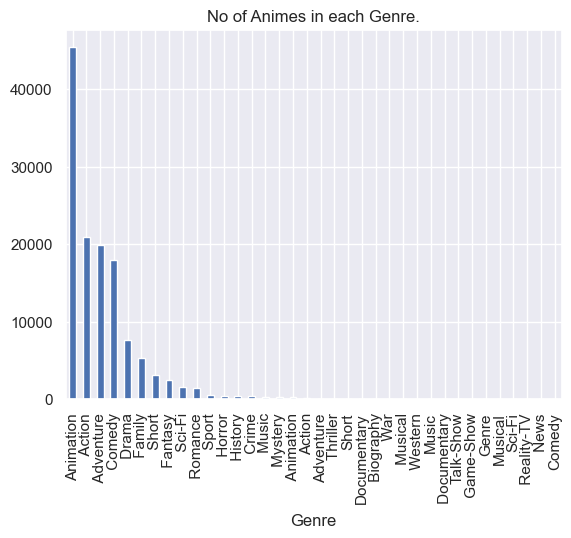

In [43]:
d1['Genre'].explode().value_counts().plot(kind='bar', title='No of Animes in each Genre.')

<Axes: title={'center': 'Top 10 Genres of Japanese Animes.'}, xlabel='Genre'>

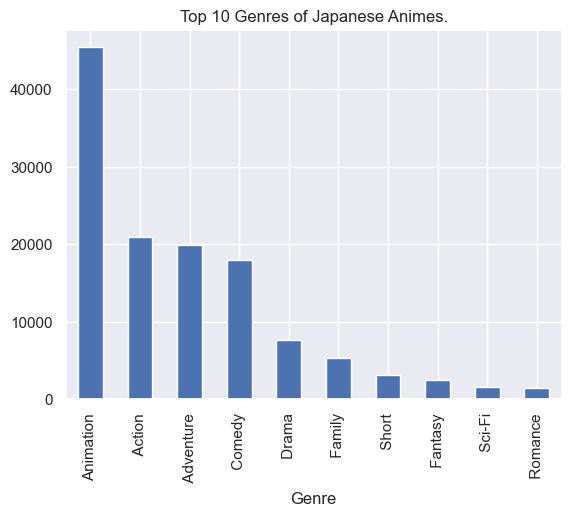

In [44]:
d1['Genre'].explode().value_counts().nlargest(10).plot(kind='bar', title='Top 10 Genres of Japanese Animes.')

In [51]:
d2 = d1.explode('Genre')
# d2['User Rating'] = d2['User Rating'].astype('float')

In [52]:
d2['User Rating'] = pd.to_numeric(d2['User Rating'], errors='coerce')
non_numeric_rows = d2[d2['User Rating'].isna()]
d2 = d2.dropna(subset=['User Rating'])
d2['User Rating'].fillna(0.0, inplace=True)
d2['User Rating'] = d2['User Rating'].astype('float')




<Axes: xlabel='Genre'>

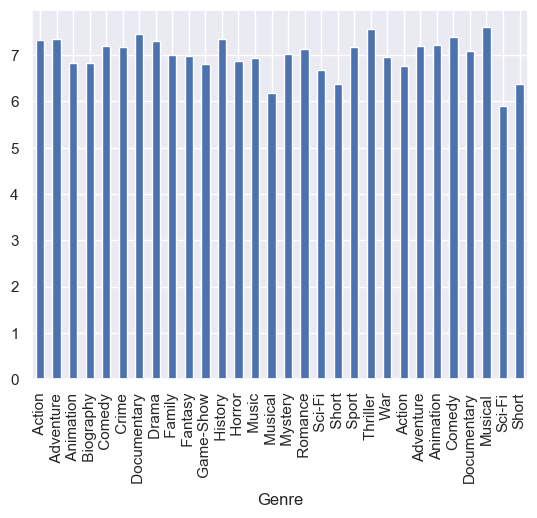

In [58]:
d2.groupby('Genre')['User Rating'].agg('mean').plot(kind='bar')

<Axes: xlabel='Genre'>

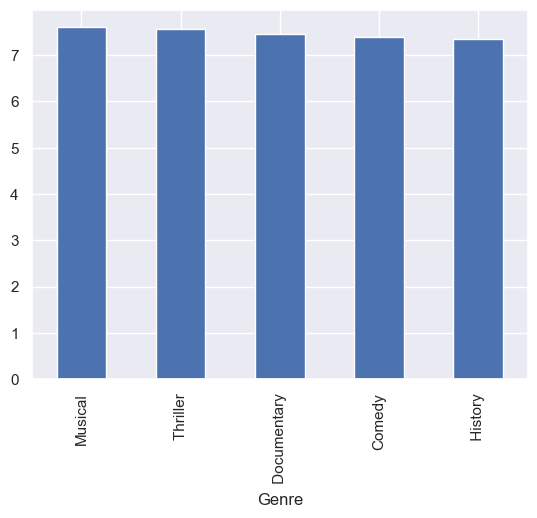

In [57]:
d2.groupby('Genre')['User Rating'].agg('mean').nlargest(5).plot(kind='bar')

In [ ]:
d2.groupby('Genre')['User Rating'].agg('mean').nlargest(5).plot(kind='bar')